# Correlation matrices
Figure 2F, Extended Figure 2F-I, Supplementary Figure 2A-C

- Author: CW
- files needed: clinical_var_analysis/celltype_mapping.csv, clinical_var_analysis/cohort_relative_subtype_proportions.csv, clinical_var_analysis/integrated_studies_relative_subtype_proportions.csv
- Last updated: 04/09/24

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

1.5.0
1.25.2
0.12.1


In [4]:
#from @wyegelwel

import scipy
import scipy.cluster.hierarchy as sch

def cluster_corr(corr_array, inplace=False):
    """
    Rearranges the correlation matrix, corr_array, so that groups of highly 
    correlated variables are next to eachother 
    
    Parameters
    ----------
    corr_array : pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix 
        
    Returns
    -------
    pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix with the columns and rows rearranged
    """
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

In [5]:
def correlation_matrix(data, title, path_to_save ):
    correlation_mat = data.corr()
    #cell_types = list(correlation_mat.columns)
    
    #reorder data 
    #drop anything that is NA (perfect correlation)
    correlation_mat = correlation_mat.dropna(axis = 'columns', how='all')
    correlation_mat = correlation_mat.dropna(axis = 'rows', how='all')
    
    clustered_corr_mat = cluster_corr(correlation_mat)

    #fig = plt.figure(figsize=(10, 8))
    sns.set(font_scale=0.71)
    clustergrid = sns.clustermap(clustered_corr_mat, cmap = "vlag", vmin = -1, vmax = 1).fig.suptitle('Correlation matrix of ' + title)
    return clustered_corr_mat

In [30]:
## load celltype mapping table
celltype_mapping = pd.read_csv('/path_to_file/celltype_mapping.csv', 
                                     index_col= 0)

In [32]:
celltype_mapping

,subtype,reannotated,compartment
1,Plasma B,B,Immune
2,Macrophage M2,Monocyte/Macrophage,Immune
3,Endothelial,Endothelial,Stromal
4,cDC1,cDC,Immune
5,Macrophage M1,Monocyte/Macrophage,Immune
6,Inflammatory fibroblast,Fibroblast,Stromal
7,cDC2,cDC,Immune
8,DN NKT,Other T,Immune
9,Monocyte non-classical,Monocyte/Macrophage,Immune
10,pDC,pDC,Immune


### import subtype relative proportion correlation matrix 

In [9]:
all_subtype_proportions = pd.read_csv('/path_to_file/cohort_relative_subtype_proportions.csv', 
                                     index_col= 0)

In [24]:
#exclude sample 1122_1
all_subtype_proportions = all_subtype_proportions.drop('1122_1', axis = 1)

In [25]:
all_subtype_proportions = all_subtype_proportions.T

In [26]:
all_subtype_proportions.columns

Index(['Plasma B/B', 'Plasma B/Immune', 'Plasma B/Total',
       'Macrophage M2/Monocyte/Macrophage', 'Macrophage M2/Immune',
       'Macrophage M2/Total', 'Endothelial/Endothelial', 'Endothelial/Stromal',
       'Endothelial/Total', 'cDC1/cDC',
       ...
       'Memory B/Immune', 'Memory B/Total',
       'Tumor - Interferon/MHC-II (I)/Tumor',
       'Tumor - Interferon/MHC-II (I)/Total',
       'Tumor - Stress (in vitro)/Tumor', 'Tumor - Stress (in vitro)/Total',
       'Tumor - Translation initiation/Tumor',
       'Tumor - Translation initiation/Total', 'Tumor - Chromatin/Tumor',
       'Tumor - Chromatin/Total'],
      dtype='object', length=148)

## 1. subset subtype to cell type proportions

In [33]:
#remove rows where the subtype and cell type are the same (ex. pDC)
subtype_to_celltype_prop_names = []
for i in range(1, len(celltype_mapping) + 1):
    #exclude proportions that are 1
    if celltype_mapping['subtype'][i] != celltype_mapping['reannotated'][i]:
        prop_name = celltype_mapping['subtype'][i] + '/' + celltype_mapping['reannotated'][i]
        subtype_to_celltype_prop_names.append(prop_name)
        

In [34]:
len(subtype_to_celltype_prop_names)

48

## Correlations of cell subtype proportions in 38 samples: Figure 2F

subtype out of cell type

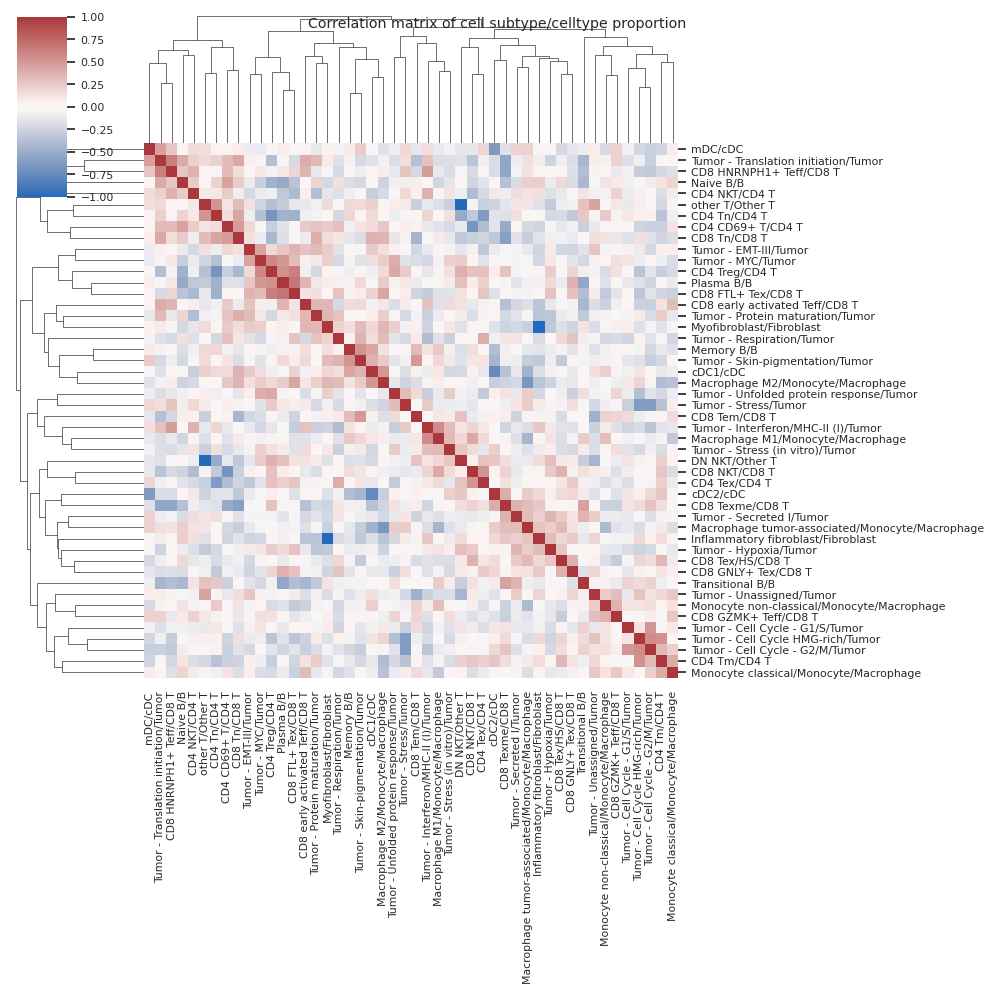

In [38]:
subtype_to_celltype_prop_names = list(set(subtype_to_celltype_prop_names))#.drop_duplicates()

subtype_to_celltype_props= all_subtype_proportions.loc[:,subtype_to_celltype_prop_names]
corr_mat = correlation_matrix(subtype_to_celltype_props, 'cell subtype/celltype proportion', 'path_to_file.pdf')

## Cell subtype relative proportion by ICI samples:  Supplementary Figure 2A

### Supplementary Figure 2A: with ICI 

In [49]:
w_ICI_patients = ['926_1','406_3','1224_3','1098_5','1232_1','1037_1','854_1','1227_1','1087_1','509_2','452_2',
 '1098_4','509_1','776_1','856_1','1009_1','1171_1','406_1','479_1','98_1','964_1','406_4','1063_1','620_1',
                  '1098_3','1122_1','880_1','1098_1','1098_2','452_1','620_2']

In [50]:
w_ICI_patients.remove('1122_1')

In [52]:
subtype_props_w_ICI = all_subtype_proportions.T.loc[:, w_ICI_patients].T#['treatment_group']

,Tumor - Respiration/Tumor,Tumor - Protein maturation/Tumor,cDC1/cDC,Myofibroblast/Fibroblast,Macrophage M2/Monocyte/Macrophage,mDC/cDC,CD4 Tn/CD4 T,other T/Other T,CD4 CD69+ T/CD4 T,CD8 Tn/CD8 T,...,Tumor - Secreted I/Tumor,Tumor - Unassigned/Tumor,Transitional B/B,CD4 Tm/CD4 T,Tumor - Cell Cycle - G2/M/Tumor,Tumor - Cell Cycle HMG-rich/Tumor,Monocyte non-classical/Monocyte/Macrophage,Tumor - Cell Cycle - G1/S/Tumor,Monocyte classical/Monocyte/Macrophage,CD8 GZMK+ Teff/CD8 T
Tumor - Respiration/Tumor,1.000000,0.370174,0.226562,0.269781,0.431143,-0.090665,-0.217792,0.005190,0.317591,0.166197,...,0.117576,-0.070209,-0.067111,-0.081460,-0.195603,0.026684,-0.135366,-0.302369,-0.268925,-0.197585
Tumor - Protein maturation/Tumor,0.370174,1.000000,0.170927,0.243853,0.272288,-0.117954,-0.137797,-0.171537,0.147182,0.334790,...,-0.160117,-0.225262,-0.446999,0.028879,-0.225228,0.002287,-0.045122,-0.217811,-0.336803,0.098573
cDC1/cDC,0.226562,0.170927,1.000000,0.287187,0.481937,0.004177,0.089842,0.130117,0.259666,0.324244,...,-0.158895,0.091279,0.069310,-0.013132,0.067440,0.105030,0.173218,0.172327,0.048853,-0.021717
Myofibroblast/Fibroblast,0.269781,0.243853,0.287187,1.000000,0.461465,0.056325,-0.021613,0.220439,0.336812,0.185575,...,-0.214008,-0.170899,0.055338,-0.289434,-0.027003,-0.138172,0.037886,-0.078346,-0.064912,0.184385
Macrophage M2/Monocyte/Macrophage,0.431143,0.272288,0.481937,0.461465,1.000000,-0.222765,-0.041345,-0.097268,0.369583,0.309258,...,-0.258201,-0.182247,-0.024209,-0.356383,-0.119257,0.141322,-0.070213,0.088067,-0.285250,-0.166992
mDC/cDC,-0.090665,-0.117954,0.004177,0.056325,-0.222765,1.000000,0.235930,0.435484,0.269617,0.172356,...,0.262301,0.145321,0.096895,-0.326135,-0.282064,-0.195587,-0.197968,-0.095696,0.080211,0.242051
CD4 Tn/CD4 T,-0.217792,-0.137797,0.089842,-0.021613,-0.041345,0.235930,1.000000,0.459004,0.190700,0.417700,...,0.152756,0.021230,0.203628,-0.360296,0.054897,0.023530,0.230063,0.159671,0.030212,-0.052596
other T/Other T,0.005190,-0.171537,0.130117,0.220439,-0.097268,0.435484,0.459004,1.000000,0.148535,0.265043,...,0.114644,0.433929,0.281320,-0.172159,-0.048962,-0.012089,-0.050194,-0.076340,0.129597,0.106401
CD4 CD69+ T/CD4 T,0.317591,0.147182,0.259666,0.336812,0.369583,0.269617,0.190700,0.148535,1.000000,0.514659,...,-0.033577,-0.238648,-0.229199,-0.534585,-0.269598,-0.365829,-0.038972,0.064665,-0.097472,0.050834
CD8 Tn/CD8 T,0.166197,0.334790,0.324244,0.185575,0.309258,0.172356,0.417700,0.265043,0.514659,1.000000,...,-0.175523,0.054352,0.030272,-0.278492,-0.083678,0.149745,0.115945,-0.046042,-0.248333,-0.166627


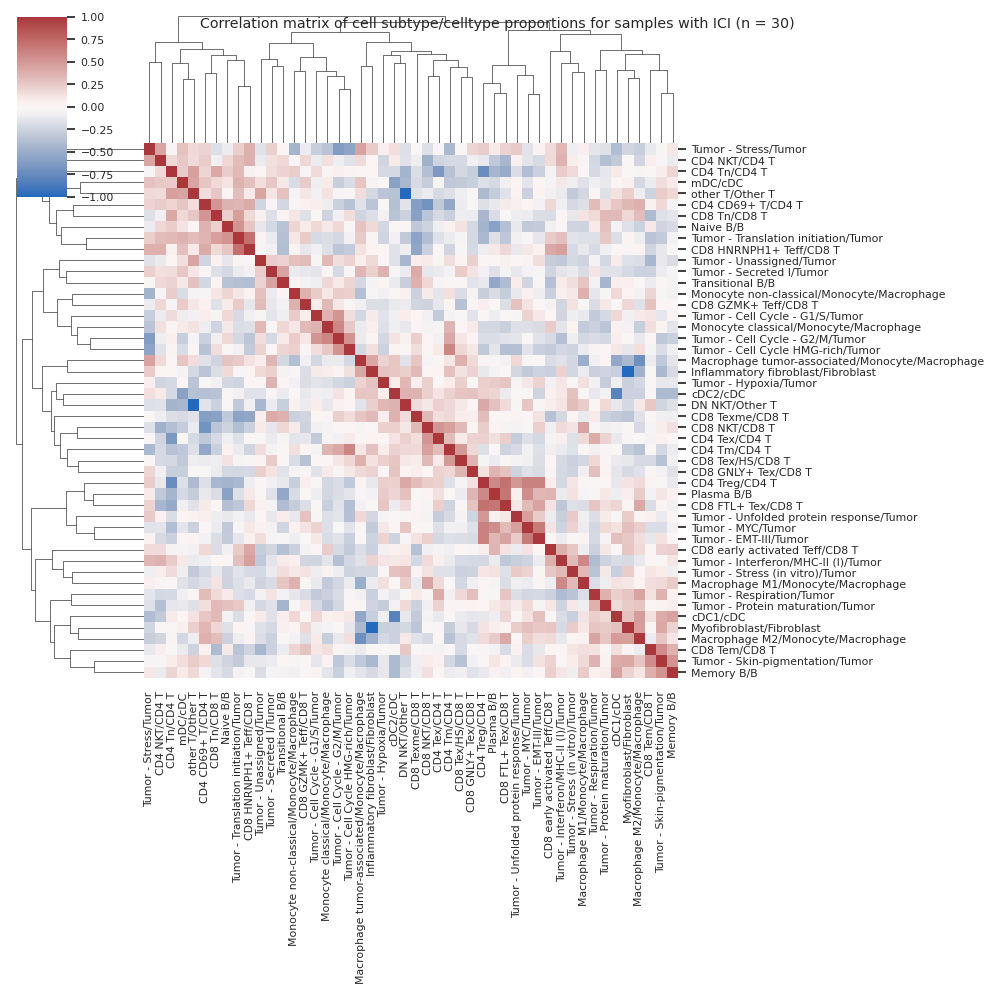

In [55]:
#subtype to celltype
subtype_to_celltype_props_w_ICI = subtype_props_w_ICI.loc[:,subtype_to_celltype_prop_names]
correlation_matrix(subtype_to_celltype_props_w_ICI, 'cell subtype/celltype proportions for samples with ICI (n = 30)', 'subtype_to_celltype_w_ICI_2.pdf')

### ICI only (n = 18 without 1122_1)

In [58]:
ICI_only_patients = ['926_1', '406_3', '1224_3','1037_1','854_1','1227_1', '1087_1', '509_2', '509_1', '776_1', 
                     '856_1', '406_1', '479_1', '406_4', '620_1', '1098_3', '1122_1', '880_1', '620_2']

In [59]:
ICI_only_patients.remove('1122_1')

In [62]:
subtype_props_ICI_only = all_subtype_proportions.T.loc[:, ICI_only_patients].T#['treatment_group']

,CD4 Tm/CD4 T,CD8 NKT/CD8 T,CD8 Tex/HS/CD8 T,CD4 Tex/CD4 T,CD8 Texme/CD8 T,Transitional B/B,Macrophage M1/Monocyte/Macrophage,Tumor - Interferon/MHC-II (I)/Tumor,Inflammatory fibroblast/Fibroblast,Macrophage tumor-associated/Monocyte/Macrophage,...,cDC1/cDC,Myofibroblast/Fibroblast,Macrophage M2/Monocyte/Macrophage,Tumor - MYC/Tumor,Tumor - Protein maturation/Tumor,CD4 CD69+ T/CD4 T,CD8 Tn/CD8 T,Tumor - Translation initiation/Tumor,Naive B/B,CD8 HNRNPH1+ Teff/CD8 T
CD4 Tm/CD4 T,1.000000,0.662073,0.817124,0.485448,0.205306,-0.003141,0.083586,-0.007948,0.219435,0.386825,...,-0.104804,-0.219435,-0.490612,-0.067095,-0.156249,-0.625406,-0.347673,-0.181053,-0.010648,-0.049611
CD8 NKT/CD8 T,0.662073,1.000000,0.618159,0.585251,0.377329,0.228833,0.475038,0.411557,0.160818,0.094202,...,-0.072411,-0.160818,-0.331705,-0.144719,-0.033423,-0.786816,-0.388713,-0.210128,-0.263340,-0.240421
CD8 Tex/HS/CD8 T,0.817124,0.618159,1.000000,0.587119,0.165901,-0.084471,0.002101,-0.237831,-0.029068,0.153805,...,0.054115,0.029068,-0.131709,0.224402,0.301789,-0.435037,-0.208675,-0.110950,0.077972,-0.118121
CD4 Tex/CD4 T,0.485448,0.585251,0.587119,1.000000,0.309060,-0.046885,0.000408,-0.013574,0.167342,0.251525,...,-0.093159,-0.167342,-0.020065,-0.083035,0.158474,-0.285992,-0.278315,-0.259711,-0.015278,0.067519
CD8 Texme/CD8 T,0.205306,0.377329,0.165901,0.309060,1.000000,0.480028,0.005694,0.160408,0.280080,-0.063701,...,-0.245620,-0.280080,0.089691,-0.205893,-0.380242,-0.560050,-0.646261,-0.612004,-0.347283,-0.548063
Transitional B/B,-0.003141,0.228833,-0.084471,-0.046885,0.480028,1.000000,0.318628,0.277818,0.045601,-0.320663,...,0.087026,-0.045601,0.029483,-0.323773,-0.559695,-0.444811,0.064954,-0.516695,-0.500848,-0.694953
Macrophage M1/Monocyte/Macrophage,0.083586,0.475038,0.002101,0.000408,0.005694,0.318628,1.000000,0.781675,0.175216,-0.430646,...,0.113757,-0.175216,-0.100634,-0.170229,-0.184883,-0.344608,0.066515,-0.240330,-0.340236,-0.116474
Tumor - Interferon/MHC-II (I)/Tumor,-0.007948,0.411557,-0.237831,-0.013574,0.160408,0.277818,0.781675,1.000000,0.407360,-0.271375,...,-0.206064,-0.407360,-0.168153,-0.207744,-0.338836,-0.453405,-0.253115,-0.280712,-0.334398,-0.092397
Inflammatory fibroblast/Fibroblast,0.219435,0.160818,-0.029068,0.167342,0.280080,0.045601,0.175216,0.407360,1.000000,0.297921,...,-0.256488,-1.000000,-0.422553,-0.525670,-0.353570,-0.293057,-0.100933,-0.153309,0.305969,0.186896
Macrophage tumor-associated/Monocyte/Macrophage,0.386825,0.094202,0.153805,0.251525,-0.063701,-0.320663,-0.430646,-0.271375,0.297921,1.000000,...,-0.392009,-0.297921,-0.644523,-0.102597,0.182146,-0.121568,-0.136906,0.357822,0.351022,0.267600


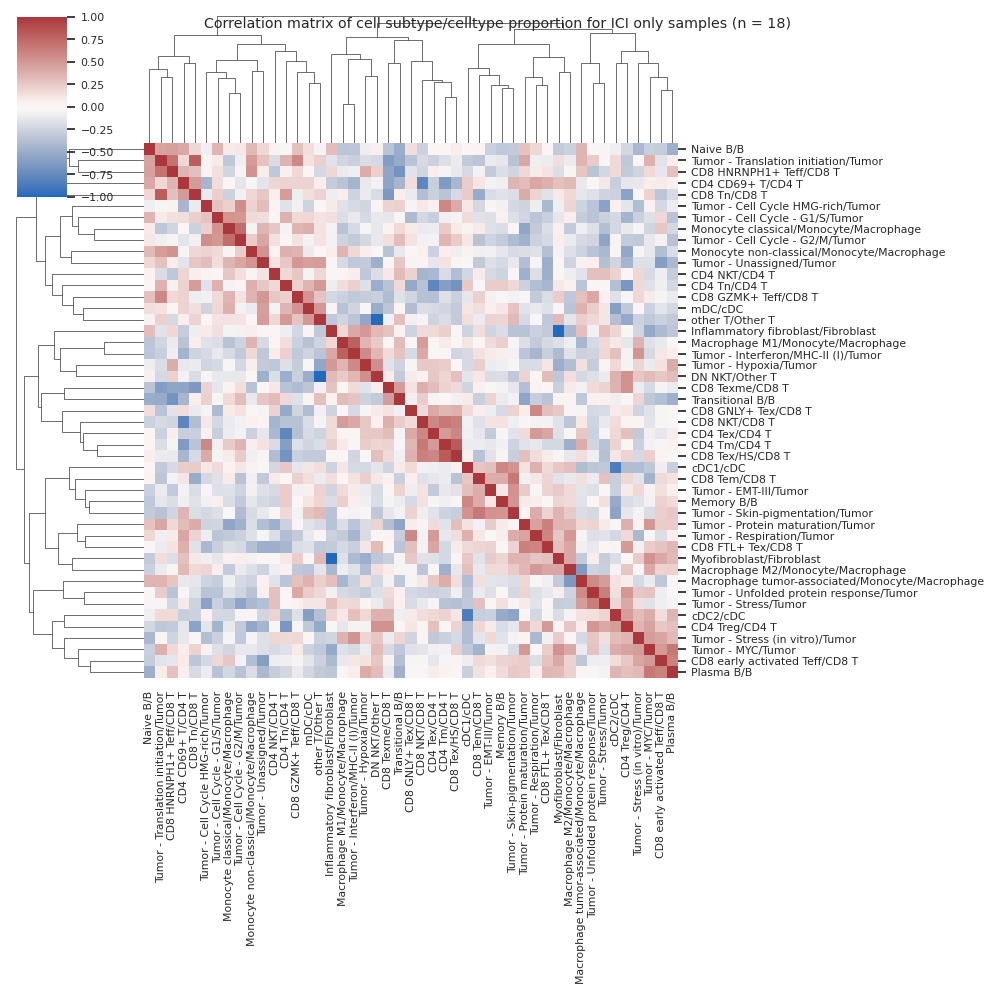

In [63]:
subtype_to_celltype_props_ICI_only = subtype_props_ICI_only.loc[:,subtype_to_celltype_prop_names]
correlation_matrix(subtype_to_celltype_props_ICI_only, 'cell subtype/celltype proportion for ICI only samples (n = 18)', 'subtype_celltype_ICI_only_2.pdf')

### ICI PD1 only 

In [66]:
ICI_PD1_patients = ['926_1', '406_3', '1224_3', '1037_1', '1227_1', '509_2', '509_1', '776_1', '856_1',
 '406_1', '479_1', '406_4', '620_1', '1122_1', '880_1']

In [67]:
ICI_PD1_patients.remove('1122_1')

In [68]:
subtype_props_ICI_PD1 = all_subtype_proportions.T.loc[:, ICI_PD1_patients].T#['treatment_group']

,Tumor - Cell Cycle - G1/S/Tumor,Monocyte non-classical/Monocyte/Macrophage,CD4 Tn/CD4 T,Tumor - Unassigned/Tumor,other T/Other T,CD8 GZMK+ Teff/CD8 T,mDC/cDC,Tumor - Translation initiation/Tumor,CD8 HNRNPH1+ Teff/CD8 T,Naive B/B,...,cDC1/cDC,Tumor - EMT-III/Tumor,Tumor - Skin-pigmentation/Tumor,CD8 Tem/CD8 T,Myofibroblast/Fibroblast,Tumor - MYC/Tumor,Tumor - Protein maturation/Tumor,Tumor - Respiration/Tumor,CD8 FTL+ Tex/CD8 T,Macrophage M2/Monocyte/Macrophage
Tumor - Cell Cycle - G1/S/Tumor,1.000000,0.274690,0.581394,0.357563,0.276971,0.137082,0.295973,0.155492,0.162197,0.362382,...,0.097928,-0.169482,-0.003019,-0.129125,-0.210290,-0.169482,-0.280176,-0.210240,-0.433045,0.161715
Monocyte non-classical/Monocyte/Macrophage,0.274690,1.000000,0.498448,0.570527,0.129564,0.426351,-0.016068,0.559742,0.545143,0.266895,...,-0.021308,-0.059311,-0.345931,-0.166880,-0.085396,-0.116335,-0.238741,-0.339600,-0.360770,-0.189263
CD4 Tn/CD4 T,0.581394,0.498448,1.000000,0.188273,0.343264,0.196019,0.264593,0.371462,0.096582,0.286725,...,0.384585,0.228132,0.068570,0.001472,-0.059498,-0.218525,-0.145980,-0.532173,-0.475755,-0.057728
Tumor - Unassigned/Tumor,0.357563,0.570527,0.188273,1.000000,0.524960,0.599297,0.511669,0.337058,0.135001,0.334085,...,0.013337,-0.184828,-0.255180,-0.367582,0.016013,-0.184828,-0.348767,-0.187080,-0.529122,-0.345867
other T/Other T,0.276971,0.129564,0.343264,0.524960,1.000000,0.254258,0.467834,0.211346,-0.222418,0.317594,...,0.322532,0.211448,0.258679,-0.102949,0.111567,-0.444688,-0.032726,-0.016035,-0.430832,-0.330224
CD8 GZMK+ Teff/CD8 T,0.137082,0.426351,0.196019,0.599297,0.254258,1.000000,0.535292,0.582735,0.186160,0.442182,...,-0.129812,-0.087271,-0.077657,0.245166,0.188632,0.068542,0.004019,-0.287601,-0.231179,-0.353919
mDC/cDC,0.295973,-0.016068,0.264593,0.511669,0.467834,0.535292,1.000000,0.058462,0.004858,0.395627,...,0.255895,0.018401,0.334403,0.250300,-0.056802,-0.334450,-0.159140,-0.085355,-0.176058,-0.441828
Tumor - Translation initiation/Tumor,0.155492,0.559742,0.371462,0.337058,0.211346,0.582735,0.058462,1.000000,0.704543,0.603020,...,-0.249159,-0.149969,-0.464724,-0.331622,0.188655,0.347617,0.441058,-0.094095,-0.088827,-0.136748
CD8 HNRNPH1+ Teff/CD8 T,0.162197,0.545143,0.096582,0.135001,-0.222418,0.186160,0.004858,0.704543,1.000000,0.517824,...,-0.228606,-0.320813,-0.311110,-0.081841,-0.228852,0.164687,0.140366,0.075441,0.146119,-0.042879
Naive B/B,0.362382,0.266895,0.286725,0.334085,0.317594,0.442182,0.395627,0.603020,0.517824,1.000000,...,-0.123167,-0.266540,-0.319290,-0.059152,-0.261135,-0.277140,0.222723,0.200136,0.010537,-0.219588


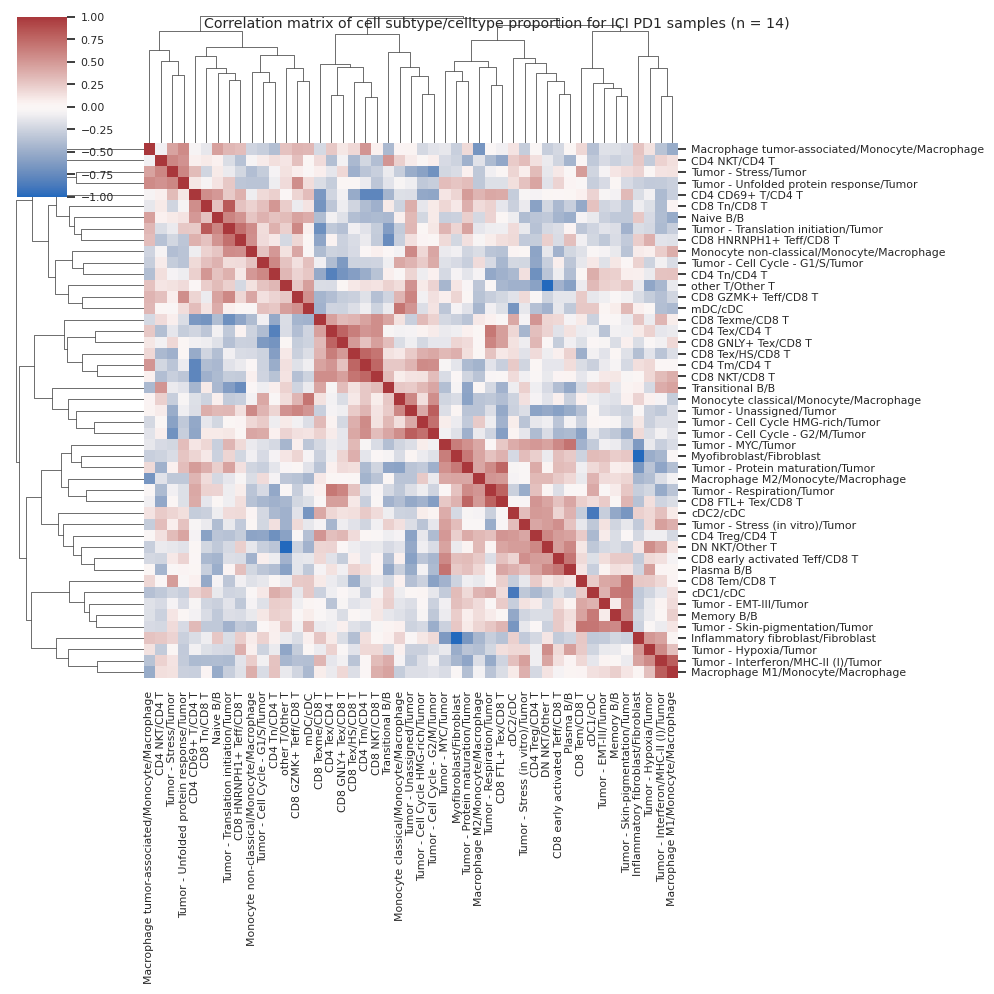

In [69]:
subtype_to_celltype_props_ICI_PD1 = subtype_props_ICI_PD1.loc[:,subtype_to_celltype_prop_names]
correlation_matrix(subtype_to_celltype_props_ICI_PD1, 'cell subtype/celltype proportion for ICI PD1 samples (n = 14)', 'subtype_celltype_ICI_PD1_2.pdf')

## Correlation matrix of subtype/cell type proportions from 89 samples from integrated studies - Supplementary Figure 2C

In [77]:
integrated_studies_rel_props = pd.read_csv('/path_to_file/integrated_studies_relative_subtype_proportions.csv',
                                          index_col = 0)


#subset out studies 0-2 
studies0_2 = integrated_studies_rel_props[['1098_5','1098_4','1098_3','1063_1','946_1','926_1','406_3','978_1',
                         '98_1','964_1','406_4','406_1','479_1','667_1','1138_1','620_1','1009_1',
                         '1171_1','1232_1','1037_1','854_1','1227_1','1087_1','509_2','880_1','1224_3',
                         '452_2','509_1','776_1','856_1','808_1','1098_1','1224_1','1224_2', '406_2','1098_2',
                          '452_1','620_2','72','58','71','80','74','81','79','82','53','59','67','65','84','78',
                            '60','88','89','75','94','Mel82','Mel53','Mel88','Mel81','Mel79','Mel89','Mel80',
                            'Mel84','Mel71','Mel75','Mel74','Mel58','Mel72','Mel60','Mel94','Mel78','Mel194',
                            'Mel102','Mel112','Mel98','Mel110','Mel103','Mel105','Mel106','Mel116','Mel478',
                            'Mel126','Mel129pa','Mel129pb','Mel04.3','Mel121.1','Mel128']]

,Macrophage M1/Monocyte/Macrophage,cDC2/cDC,CD8 NKT/CD8 T,CD8 Tem/CD8 T,CD4 Te/CD4 T,Transitional B/B,Tumor - Skin-pigmentation/Tumor,DN NKT/Other T,Tumor - Protein maturation/Tumor,Tumor - Cell Cycle - G1/S/Tumor,...,CD8 Teme/CD8 T,CD8 Te/HS/CD8 T,Plasma B/B,CD8 FTL+ Te/CD8 T,mDC/cDC,Tumor - Secreted I/Tumor,Macrophage M2/Monocyte/Macrophage,Macrophage tumor-associated/Monocyte/Macrophage,Tumor - EMT-III/Tumor,Memory B/B
Macrophage M1/Monocyte/Macrophage,1.000000,0.469799,0.429379,0.129743,0.479897,0.264988,0.510232,0.234648,0.196194,-0.112558,...,-0.308151,-0.210687,-0.047851,-0.306756,-0.359952,-0.141098,-0.574262,-0.495800,-0.100973,-0.026149
cDC2/cDC,0.469799,1.000000,0.485361,0.401062,0.435272,0.277899,0.341197,0.104229,0.022276,-0.167342,...,-0.270729,-0.222339,-0.048352,-0.403955,-0.752673,-0.060817,-0.334600,-0.095440,-0.132823,-0.356940
CD8 NKT/CD8 T,0.429379,0.485361,1.000000,0.180841,0.627322,0.409893,0.655826,0.090458,-0.049508,0.150409,...,-0.404384,-0.259947,-0.035945,-0.306513,-0.340703,-0.101425,-0.227207,-0.123300,-0.114647,-0.107926
CD8 Tem/CD8 T,0.129743,0.401062,0.180841,1.000000,0.367525,0.454823,0.617534,0.153162,0.189125,-0.199955,...,-0.577231,-0.283803,-0.226096,-0.274862,-0.267883,-0.178737,0.069658,-0.175652,-0.215707,-0.002860
CD4 Te/CD4 T,0.479897,0.435272,0.627322,0.367525,1.000000,0.383038,0.528993,0.219997,0.410010,-0.024373,...,-0.462812,-0.247139,-0.033879,-0.307937,-0.283544,-0.091497,-0.165036,-0.318014,-0.189512,-0.124917
Transitional B/B,0.264988,0.277899,0.409893,0.454823,0.383038,1.000000,0.329150,-0.084013,-0.084361,-0.035089,...,-0.278282,-0.214285,-0.584446,-0.408946,-0.235484,0.270108,-0.081616,-0.117315,-0.178219,-0.110053
Tumor - Skin-pigmentation/Tumor,0.510232,0.341197,0.655826,0.617534,0.528993,0.329150,1.000000,-0.238495,-0.207171,-0.116143,...,-0.419472,-0.357381,0.010512,-0.244343,-0.167605,-0.078746,-0.000358,-0.286111,-0.086166,0.044515
DN NKT/Other T,0.234648,0.104229,0.090458,0.153162,0.219997,-0.084013,-0.238495,1.000000,0.548977,0.090388,...,0.002067,-0.086639,0.246613,0.039149,-0.030366,-0.079258,-0.203873,-0.207755,-0.098422,-0.088358
Tumor - Protein maturation/Tumor,0.196194,0.022276,-0.049508,0.189125,0.410010,-0.084361,-0.207171,0.548977,1.000000,-0.127543,...,-0.195873,-0.086797,0.047867,0.033743,-0.039695,-0.074579,-0.084961,-0.072561,0.143632,0.008490
Tumor - Cell Cycle - G1/S/Tumor,-0.112558,-0.167342,0.150409,-0.199955,-0.024373,-0.035089,-0.116143,0.090388,-0.127543,1.000000,...,0.154541,-0.005249,0.119514,0.009698,0.349219,-0.097296,0.304254,-0.161319,-0.051701,0.013577


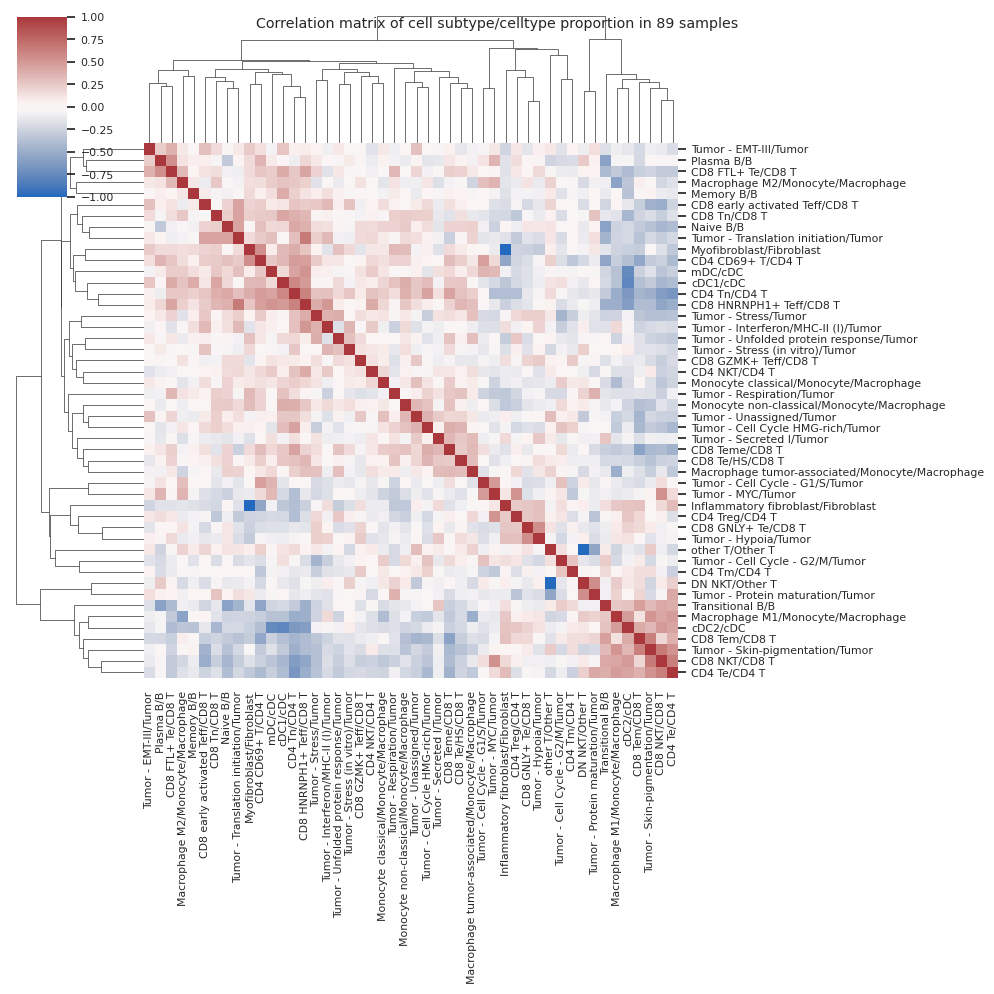

In [82]:
correlation_matrix(studies0_2.T, 'cell subtype/celltype proportion in 89 samples', 'subtype_celltype_ICI_PD1_2.pdf')